## Diamond Price Prediction EDA

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data Ingestion
df = pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [26]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### No missing value is present on this data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [28]:
df.shape

(193573, 11)

In [29]:
# Let's drop the id column
df = df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [30]:
# Check for duplicat record
df.duplicated().sum()

0

### There is no duplicates records found on this dataset


In [31]:
# Segregate numerical and categorical column
numerical_columns = [column for column in df.columns if df[column].dtypes !=object]
categorical_columns = [column for column in df.columns if df[column].dtypes ==object]
print(f"Numerical Columns : {numerical_columns}")
print(f"Categorical Columns : {categorical_columns}")

Numerical Columns : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical Columns : ['cut', 'color', 'clarity']


## **EDA For Categorical Columns**

In [32]:
# Info of the categorical column
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [33]:
# For `Cut` Column
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [34]:
# For `Color` Column
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [35]:
# For `Clarity` Column
df['clarity'].value_counts()


clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

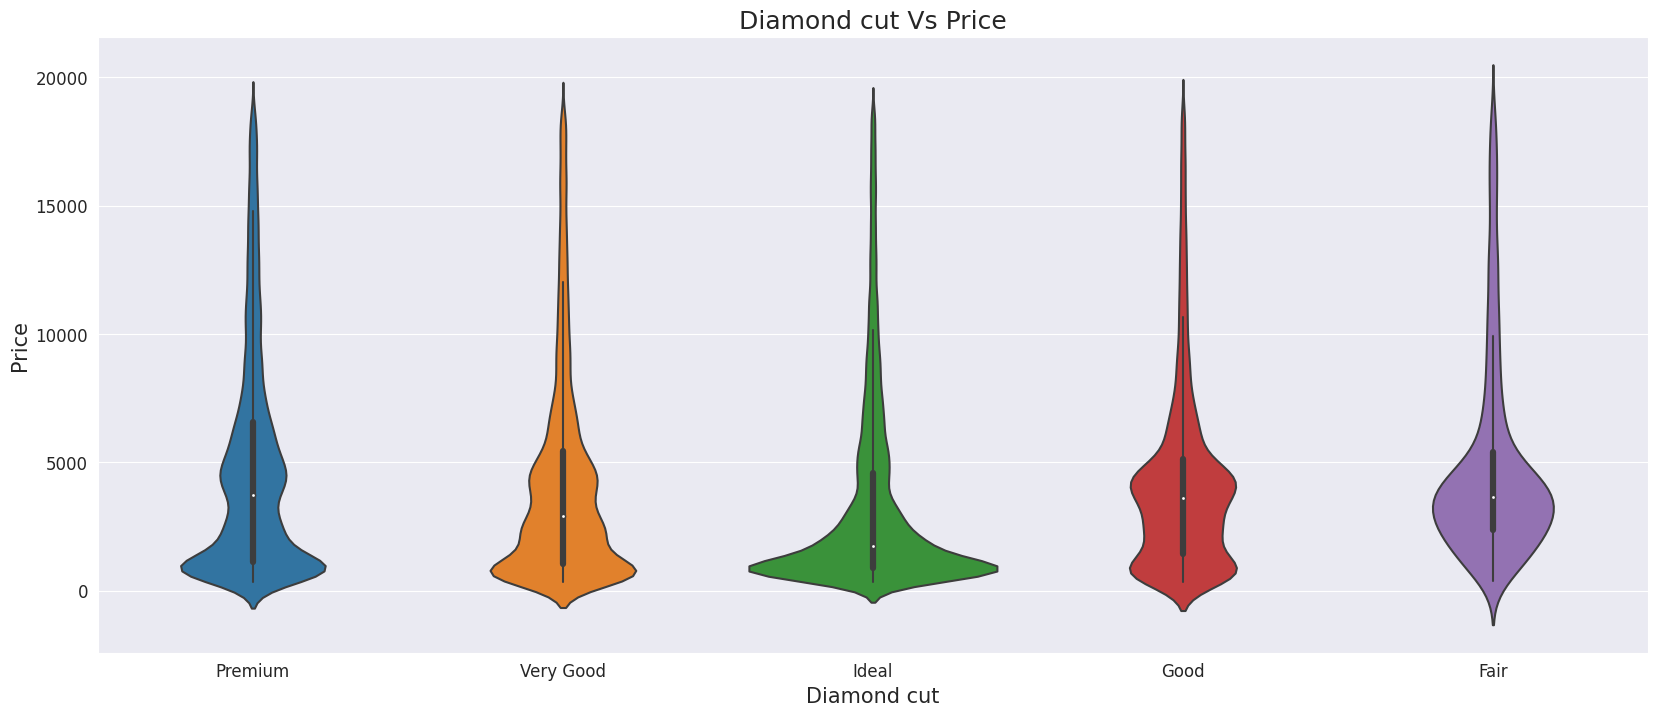

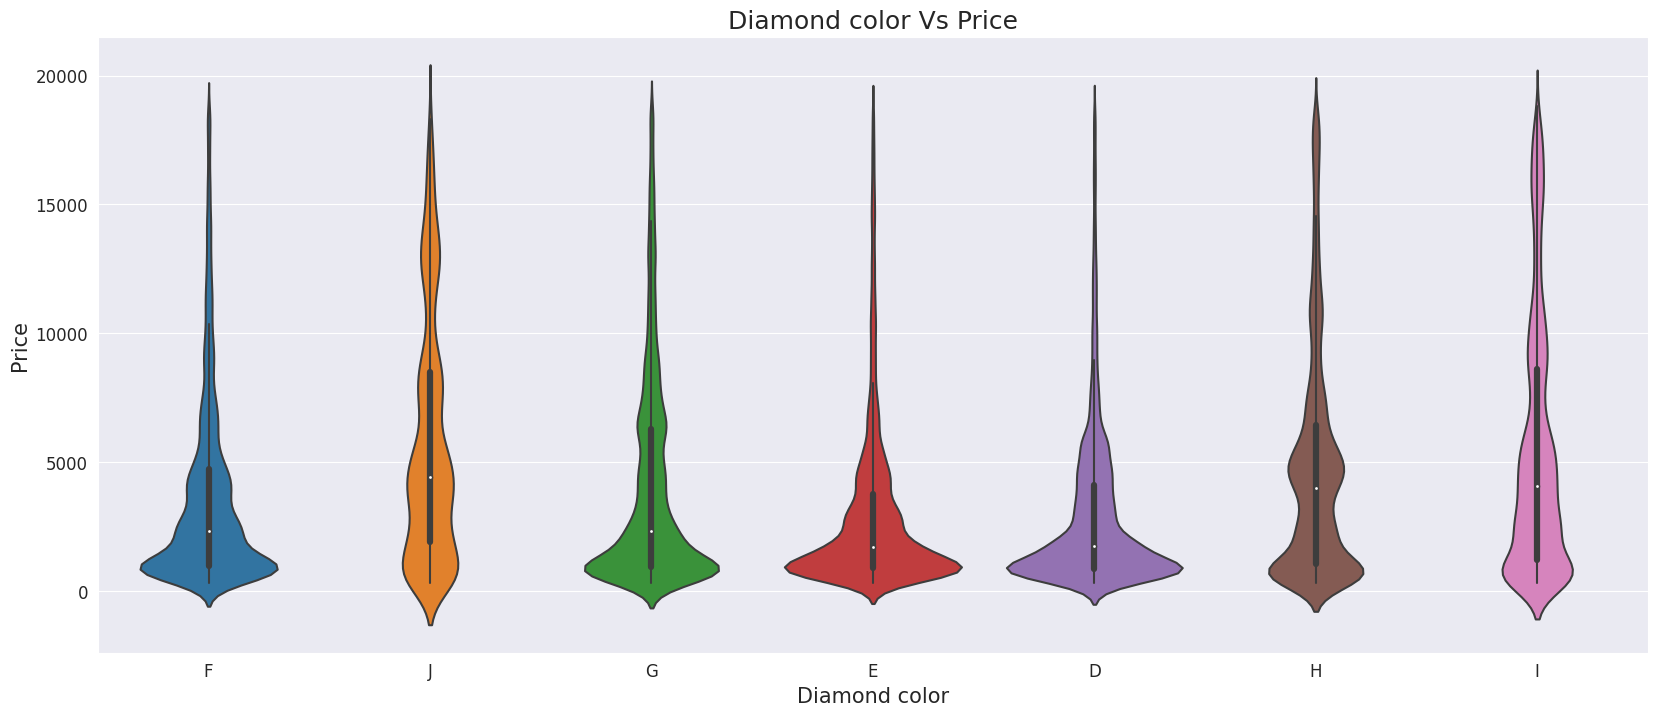

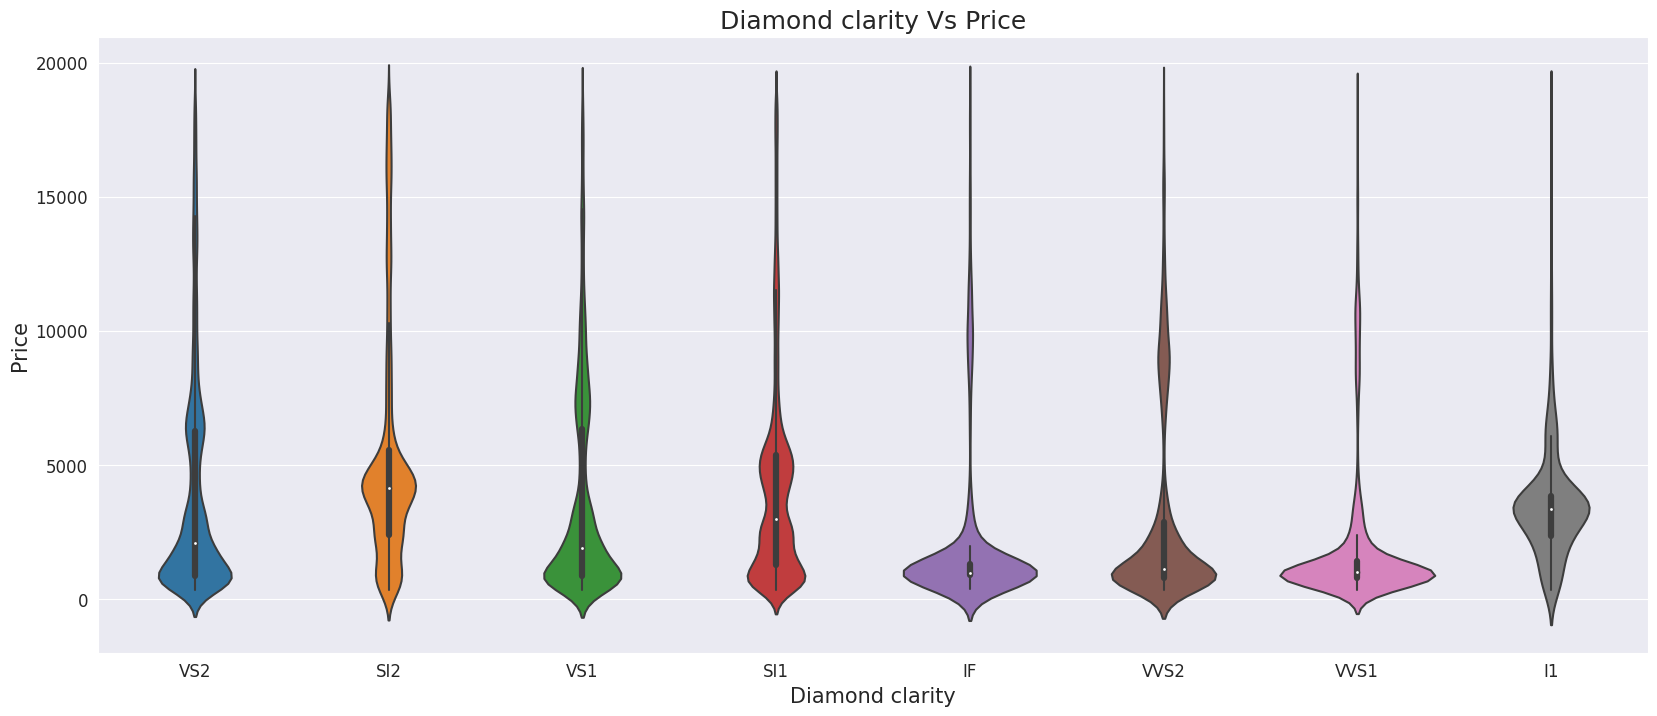

In [36]:
# Catplot, to show the distribution of the Categorical Data

for column in categorical_columns:
    plt.figure(figsize=(20,8))
    plt.grid(True)
    sns.violinplot(data=df, x=column, y='price')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(f'Diamond {column}', fontsize=15)
    plt.ylabel('Price', fontsize=15)
    plt.title(f'Diamond {column} Vs Price', fontsize=18)
    print('\n')
    plt.show()

## **EDA For Numerical Columns**


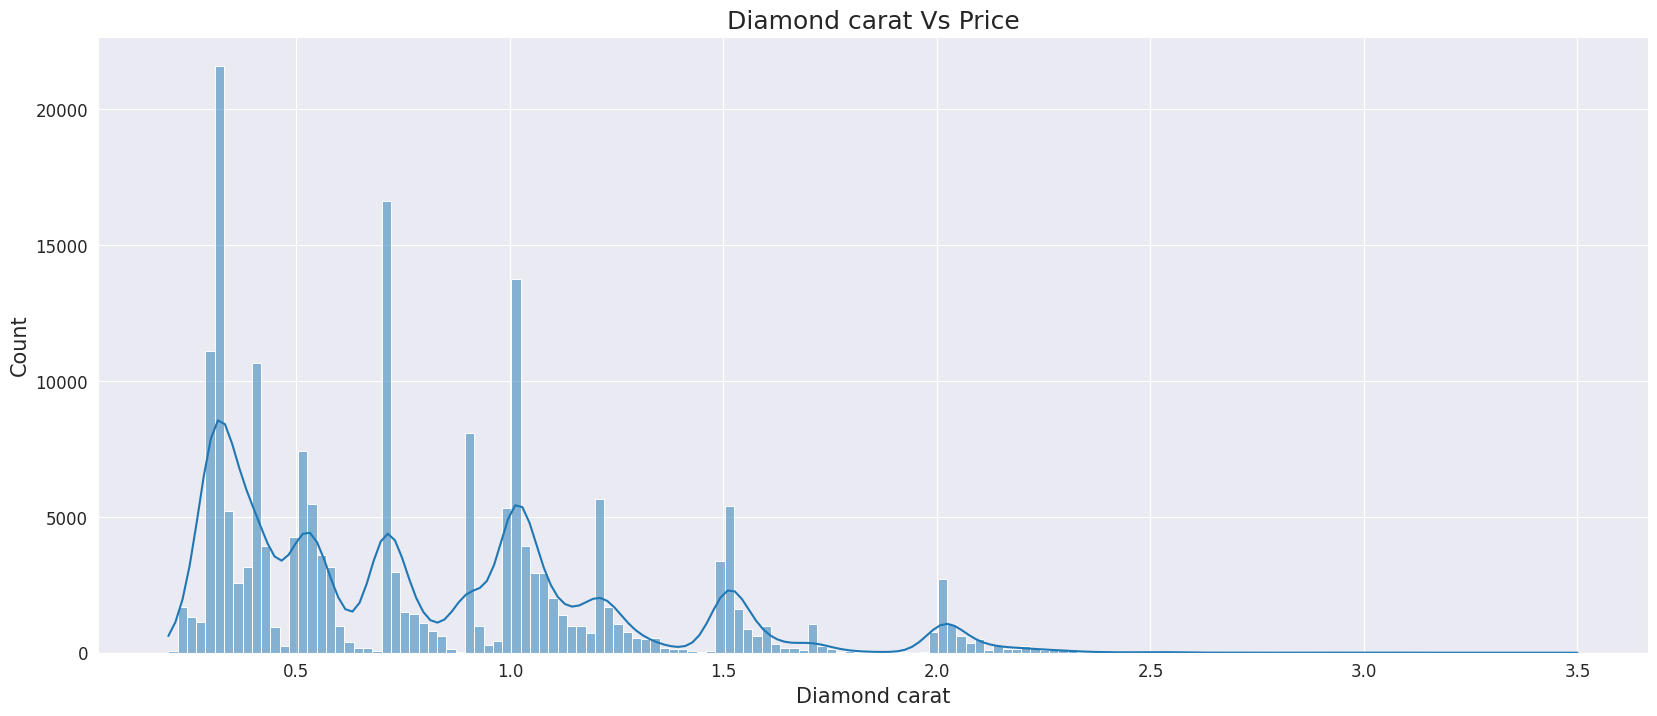

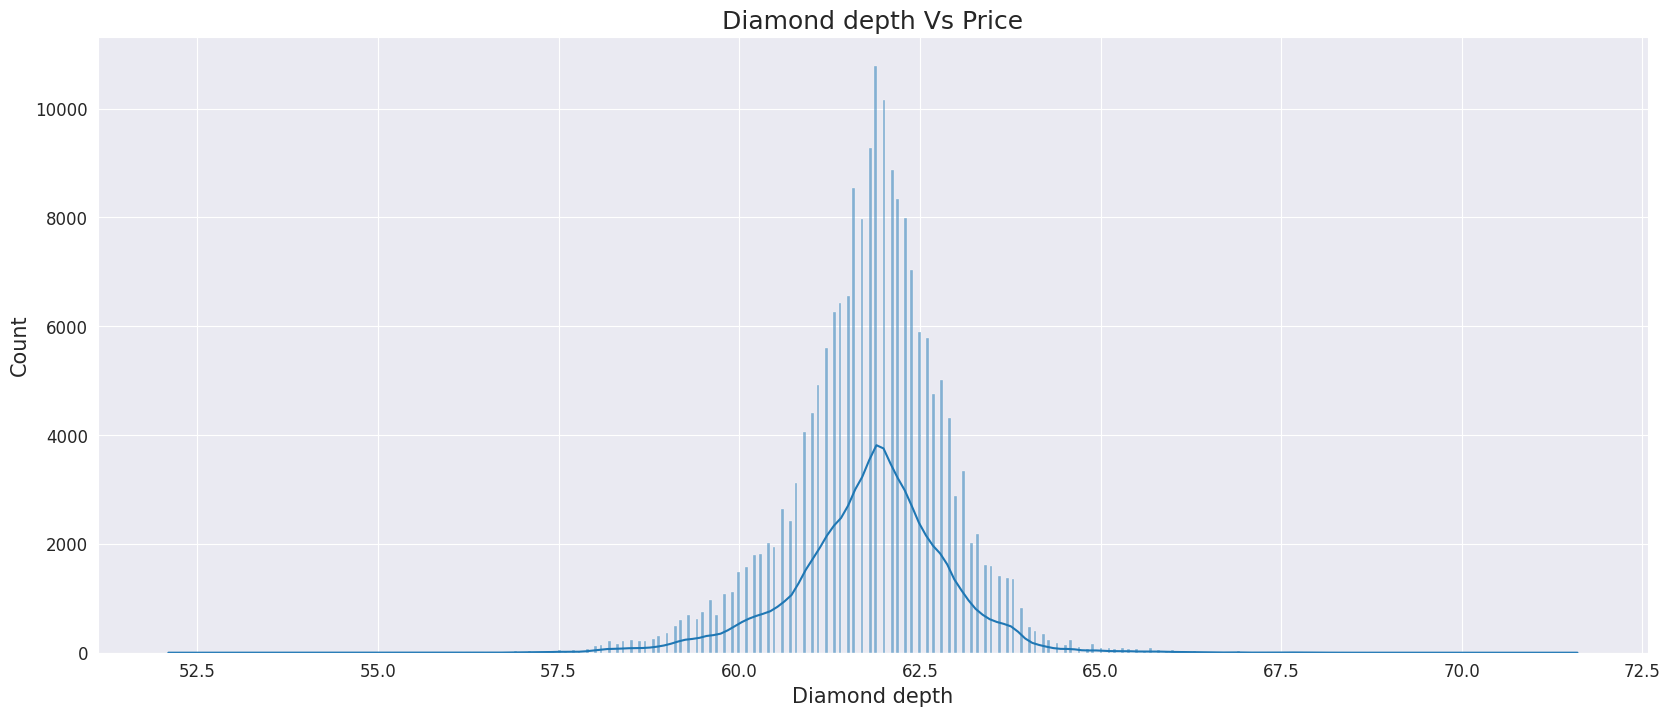

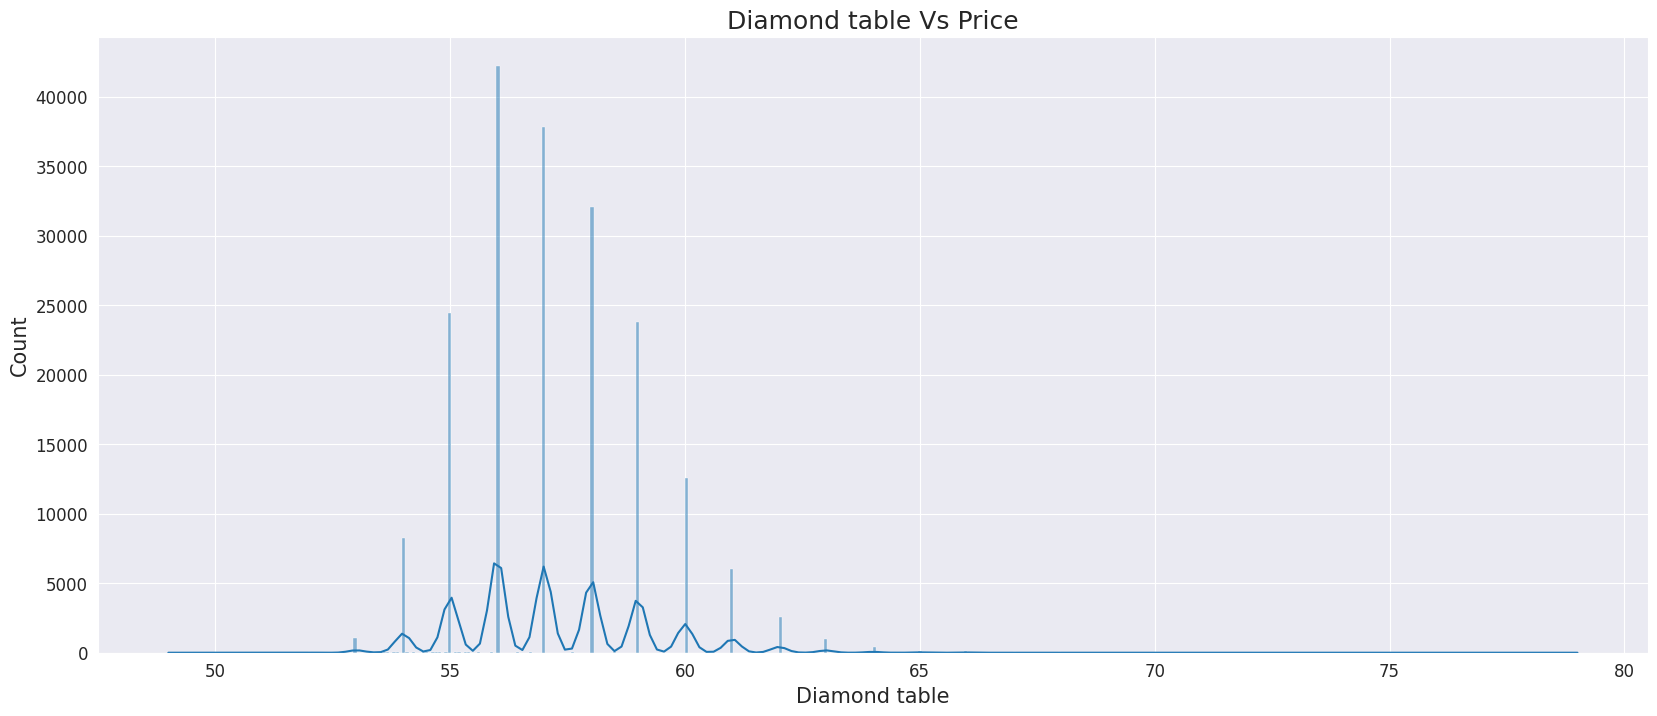

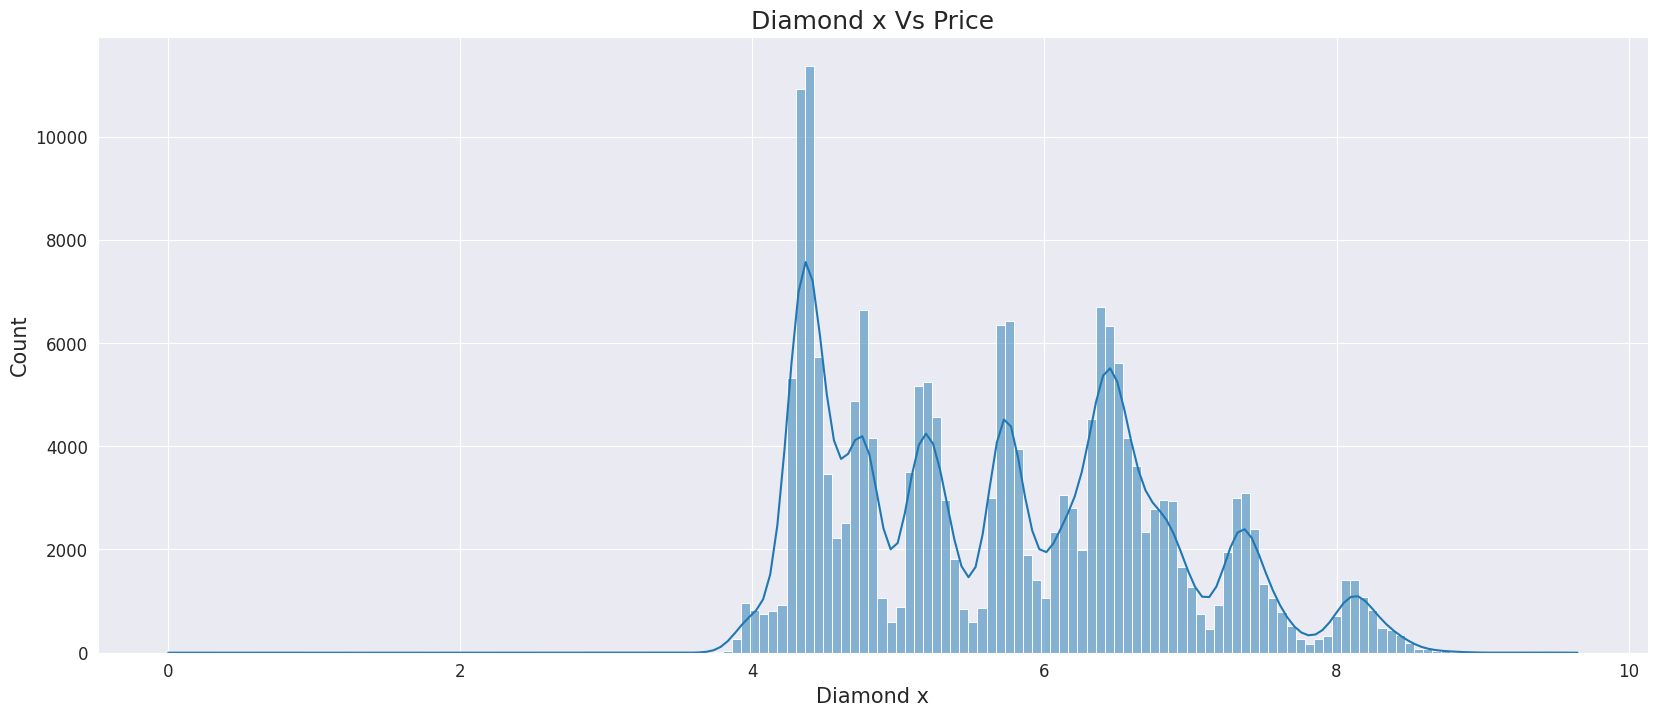

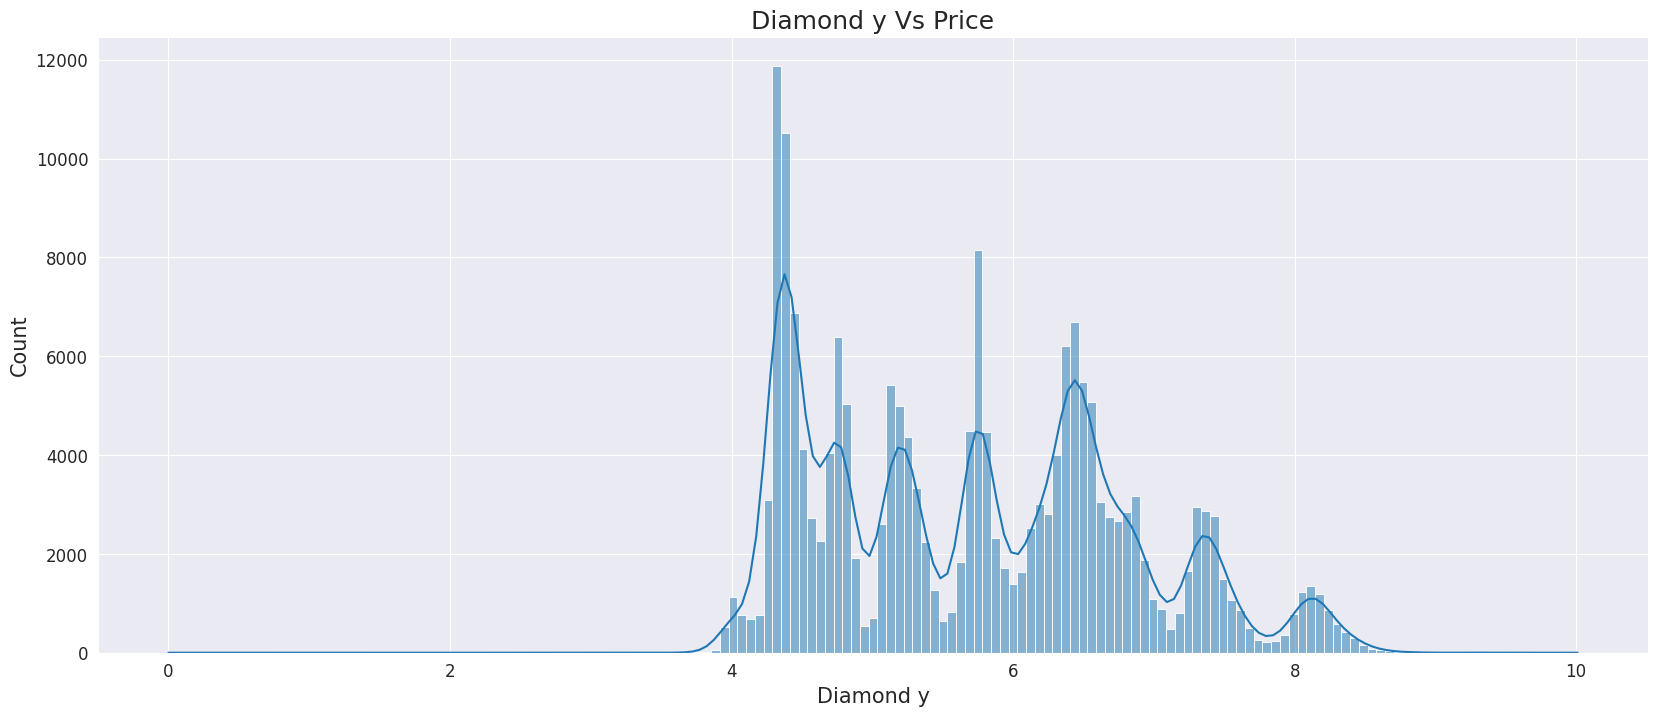

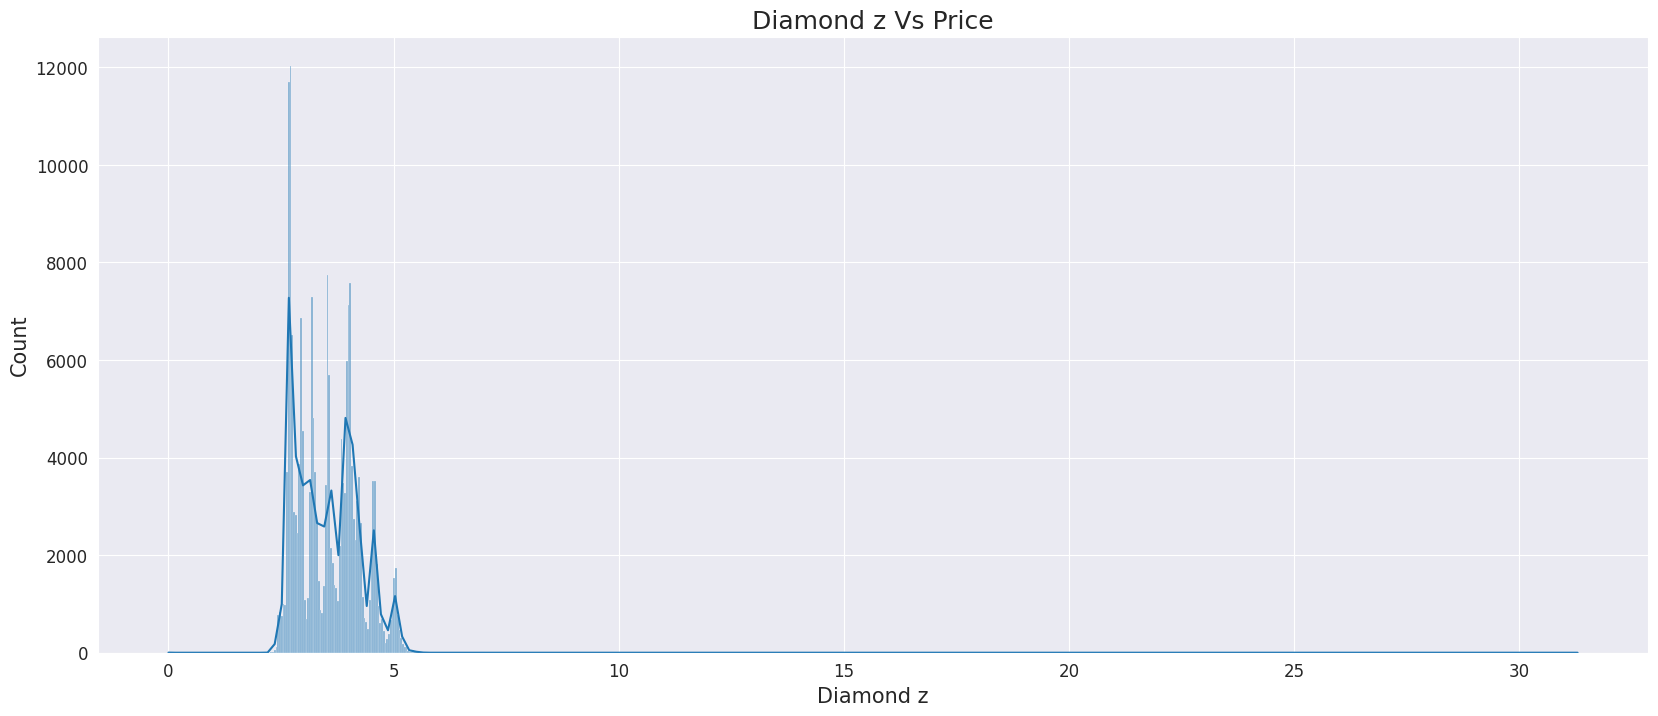

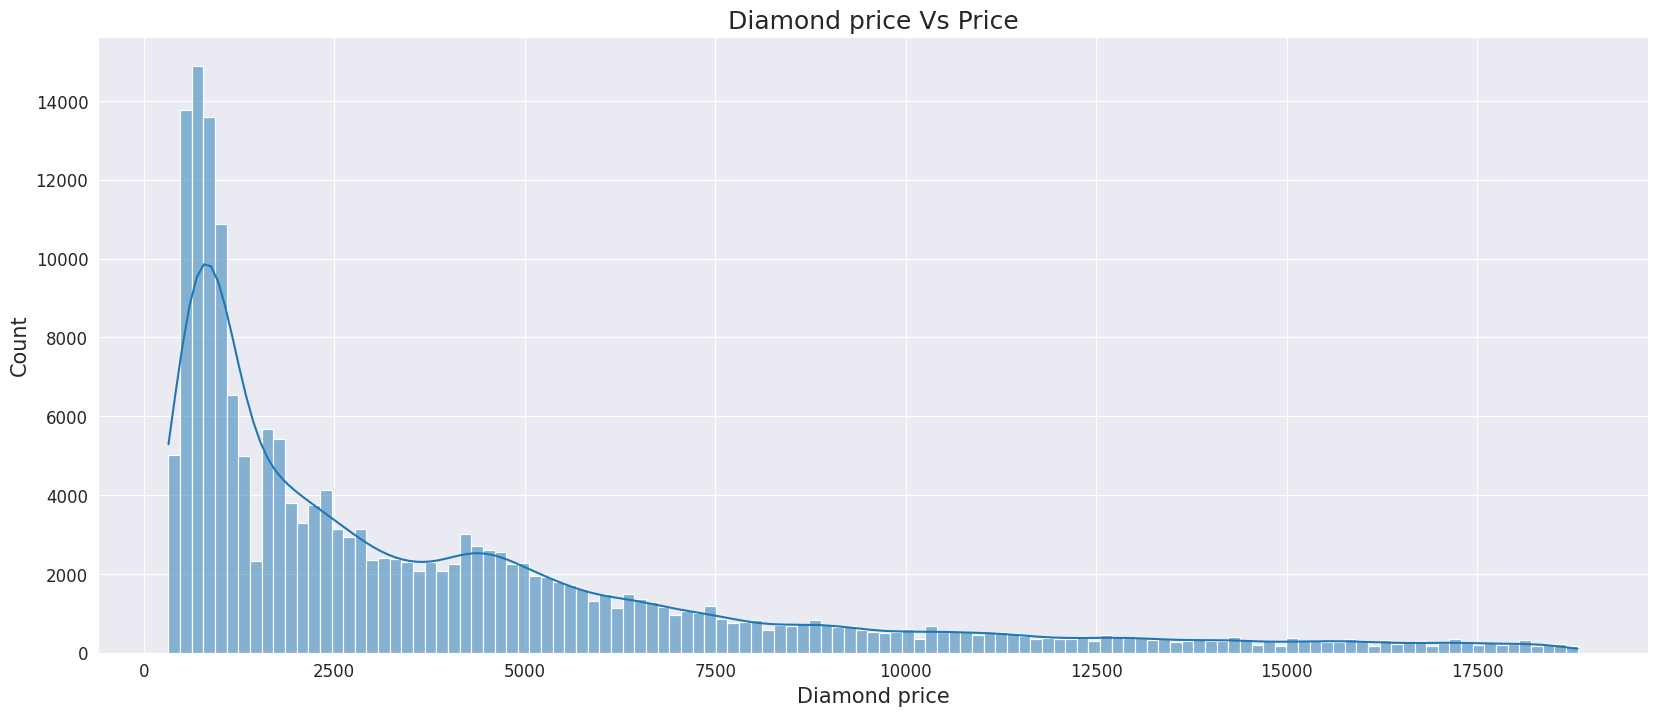

In [37]:
# Plot Histogram to show the distribution of the numerical data
for column in numerical_columns:
    plt.figure(figsize=(20,8))
    plt.grid(True)
    sns.histplot(data=df,x=column, kde=True, fill=True)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(f'Diamond {column}', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.title(f'Diamond {column} Vs Price', fontsize=18)
    print('\n')
    plt.show()


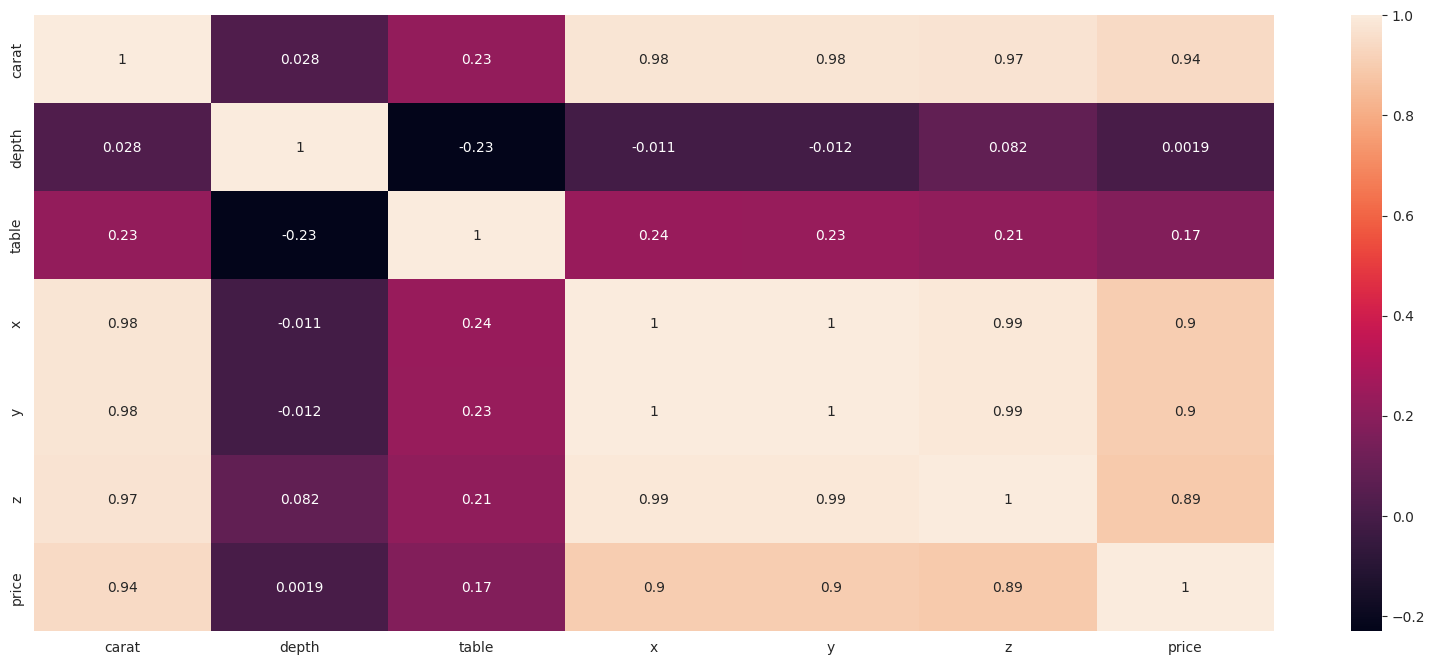

In [38]:
# Now we will find the relationship within the numerical feature using heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df[numerical_columns].corr(), annot=True)
plt.show()


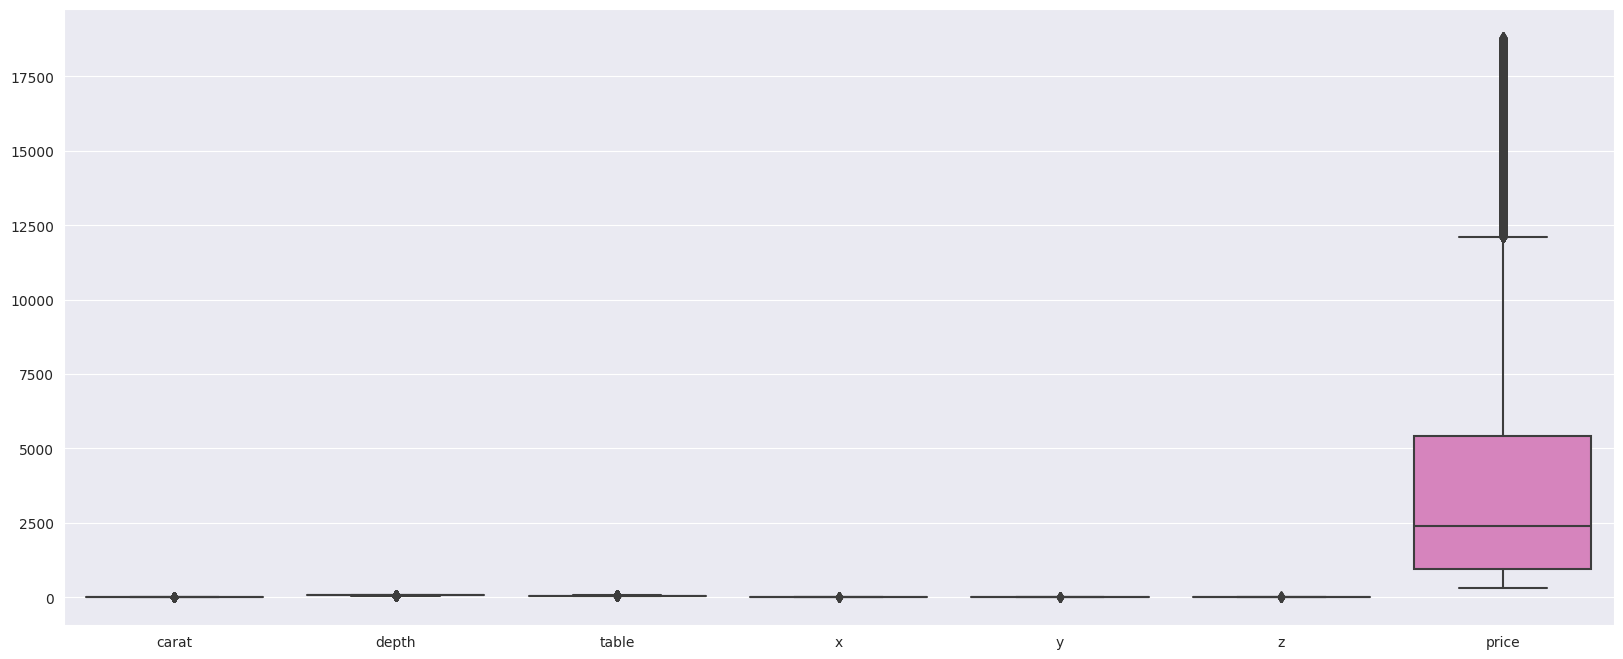

In [39]:
# Find the Outlier of the numerical data
plt.figure(figsize=(20,8))
sns.boxplot(df[numerical_columns])
plt.show()

In [40]:
# Categorical data Encoding
# For Domain Purpose https://www.americangemsociety.org/ags-diamond-grading-system/
categorical_columns


['cut', 'color', 'clarity']

In [41]:
df['cut'].value_counts()


cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [42]:
cut_map = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}
df['cut'] = df['cut'].map(cut_map)


In [43]:
df['cut'].value_counts()


cut
5    92454
4    49910
3    37566
2    11622
1     2021
Name: count, dtype: int64

In [44]:
df['color'].value_counts()


color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [45]:
color_map = {"D":1, "E":2, "F":3, "G":4, "H":5, "I":6, "J":7}
df['color'] = df['color'].map(color_map)


In [46]:
df['color'].value_counts()


color
4    44391
2    35869
3    34258
5    30799
1    24286
6    17514
7     6456
Name: count, dtype: int64

In [47]:
df['clarity'].value_counts()


clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [48]:
clarity_map = {"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}
df['clarity'] = df['clarity'].map(clarity_map)


In [49]:
df['clarity'].value_counts()

clarity
3    53272
4    48027
5    30669
2    30484
6    15762
7    10628
8     4219
1      512
Name: count, dtype: int64

In [50]:
df.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
